In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49889 stdev: 0.06928
Best fitness: 0.70934 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.207
Mean genetic distance 2.884, standard deviation 0.458
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53836 stdev: 0.07252
Best fitness: 0.72604 - size: (2, 14) - species 19 - id 370
Average adjusted fitness: 0.195
Mean genetic distance 2.955, standard deviation 0.461
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 10.150 sec (8.672 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55710 stdev: 0.07562
Best fitness: 0.75201 - size: (2, 14) - species 1 - id 485
Average adjusted fitness: 0.172
Mean genetic distance 2.937, standard deviation 0.464
Population of 203 members in 26 species
Total extinct

Population's average fitness: 0.64340 stdev: 0.10122
Best fitness: 0.82498 - size: (4, 18) - species 15 - id 3552
Average adjusted fitness: 0.235
Mean genetic distance 3.177, standard deviation 0.517
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 15.302 sec (13.921 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64400 stdev: 0.10689
Best fitness: 0.82498 - size: (4, 18) - species 15 - id 3552
Average adjusted fitness: 0.225
Mean genetic distance 3.189, standard deviation 0.524
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 18.704 sec (14.532 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64288 stdev: 0.10431
Best fitness: 0.82498 - size: (4, 18) - species 15 - id 3552
Average adjusted fitness: 0.216
Mean genetic distance 3.213, standard deviation 0.522
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 18.946 sec (15.189 average)

 

Population's average fitness: 0.66746 stdev: 0.10362
Best fitness: 0.83488 - size: (7, 22) - species 15 - id 7086
Average adjusted fitness: 0.182
Mean genetic distance 3.138, standard deviation 0.541
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 14.983 sec (14.748 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64436 stdev: 0.11041
Best fitness: 0.83488 - size: (7, 22) - species 15 - id 7086
Average adjusted fitness: 0.230
Mean genetic distance 3.164, standard deviation 0.548
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 14.923 sec (14.752 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64118 stdev: 0.11198
Best fitness: 0.83488 - size: (7, 22) - species 15 - id 7086
Average adjusted fitness: 0.276
Mean genetic distance 3.191, standard deviation 0.549
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.078 sec (14.862 average)

 

Population's average fitness: 0.67044 stdev: 0.11064
Best fitness: 0.83612 - size: (7, 23) - species 48 - id 9432
Average adjusted fitness: 0.302
Mean genetic distance 3.219, standard deviation 0.594
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.436 sec (16.289 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66005 stdev: 0.11483
Best fitness: 0.83612 - size: (7, 23) - species 48 - id 9432
Average adjusted fitness: 0.295
Mean genetic distance 3.201, standard deviation 0.586
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.637 sec (16.292 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66309 stdev: 0.11453
Best fitness: 0.83612 - size: (7, 23) - species 48 - id 9432
Average adjusted fitness: 0.343
Mean genetic distance 3.186, standard deviation 0.584
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 16.417 sec (16.320 average)

 

Population's average fitness: 0.64988 stdev: 0.12319
Best fitness: 0.84168 - size: (9, 25) - species 48 - id 11787
Average adjusted fitness: 0.351
Mean genetic distance 3.248, standard deviation 0.588
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 18.706 sec (18.779 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65524 stdev: 0.12054
Best fitness: 0.84168 - size: (9, 25) - species 48 - id 11787
Average adjusted fitness: 0.262
Mean genetic distance 3.267, standard deviation 0.600
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 18.922 sec (18.853 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.66871 stdev: 0.11242
Best fitness: 0.84168 - size: (9, 25) - species 48 - id 11787
Average adjusted fitness: 0.259
Mean genetic distance 3.249, standard deviation 0.581
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 19.322 sec (18.963 average)

Population's average fitness: 0.65497 stdev: 0.13336
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.340
Mean genetic distance 3.149, standard deviation 0.584
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 21.238 sec (21.134 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67560 stdev: 0.11770
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.263
Mean genetic distance 3.077, standard deviation 0.580
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 20.758 sec (21.133 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.66853 stdev: 0.12098
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.330
Mean genetic distance 3.091, standard deviation 0.576
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.235 sec (21.029 ave

Population's average fitness: 0.67058 stdev: 0.12794
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.390
Mean genetic distance 3.014, standard deviation 0.580
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 23.207 sec (23.220 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.68899 stdev: 0.11665
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.306
Mean genetic distance 3.013, standard deviation 0.566
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.329 sec (23.288 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67621 stdev: 0.12113
Best fitness: 0.84230 - size: (12, 33) - species 61 - id 17055
Average adjusted fitness: 0.384
Mean genetic distance 3.014, standard deviation 0.572
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 23.128 sec (23.046 ave

Population's average fitness: 0.64260 stdev: 0.09421
Best fitness: 0.78726 - size: (3, 14) - species 7 - id 1359
Average adjusted fitness: 0.266
Mean genetic distance 3.082, standard deviation 0.517
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.967 sec (13.078 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62737 stdev: 0.10703
Best fitness: 0.78726 - size: (3, 14) - species 7 - id 1359
Average adjusted fitness: 0.421
Mean genetic distance 3.097, standard deviation 0.517
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 13.711 sec (13.186 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64123 stdev: 0.09162
Best fitness: 0.78726 - size: (3, 14) - species 7 - id 1359
Average adjusted fitness: 0.256
Mean genetic distance 3.088, standard deviation 0.530
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 13.803 sec (13.307 average)

 ***

Population's average fitness: 0.65212 stdev: 0.10737
Best fitness: 0.81694 - size: (5, 17) - species 19 - id 6388
Average adjusted fitness: 0.259
Mean genetic distance 3.171, standard deviation 0.537
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 16.291 sec (15.244 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66923 stdev: 0.09173
Best fitness: 0.81694 - size: (5, 17) - species 19 - id 6388
Average adjusted fitness: 0.323
Mean genetic distance 3.191, standard deviation 0.519
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 15.746 sec (15.279 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64721 stdev: 0.11178
Best fitness: 0.81694 - size: (5, 17) - species 19 - id 6388
Average adjusted fitness: 0.263
Mean genetic distance 3.187, standard deviation 0.508
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.522 sec (15.311 average)

 

Population's average fitness: 0.65497 stdev: 0.10638
Best fitness: 0.82622 - size: (7, 25) - species 38 - id 8719
Average adjusted fitness: 0.258
Mean genetic distance 3.111, standard deviation 0.554
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 17.511 sec (17.364 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.66971 stdev: 0.10457
Best fitness: 0.82622 - size: (7, 25) - species 38 - id 8719
Average adjusted fitness: 0.315
Mean genetic distance 3.112, standard deviation 0.572
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 17.544 sec (17.412 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66059 stdev: 0.11069
Best fitness: 0.82622 - size: (7, 25) - species 38 - id 8719
Average adjusted fitness: 0.304
Mean genetic distance 3.089, standard deviation 0.571
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 17.970 sec (17.495 average)

 

Population's average fitness: 0.65050 stdev: 0.10430
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.275
Mean genetic distance 3.092, standard deviation 0.601
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 20.901 sec (19.915 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.65018 stdev: 0.10547
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.280
Mean genetic distance 3.106, standard deviation 0.585
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 20.187 sec (19.995 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66637 stdev: 0.10470
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.318
Mean genetic distance 3.155, standard deviation 0.581
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 19.685 sec (19.995 avera

Population's average fitness: 0.66425 stdev: 0.09872
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.265
Mean genetic distance 3.118, standard deviation 0.666
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 22.118 sec (22.188 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.65805 stdev: 0.10101
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.272
Mean genetic distance 3.105, standard deviation 0.666
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 22.140 sec (22.170 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66976 stdev: 0.09613
Best fitness: 0.83983 - size: (17, 47) - species 56 - id 12732
Average adjusted fitness: 0.270
Mean genetic distance 3.074, standard deviation 0.672
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 22.097 sec (22.216 ave

Population's average fitness: 0.65974 stdev: 0.10160
Best fitness: 0.83983 - size: (18, 47) - species 63 - id 21263
Average adjusted fitness: 0.259
Mean genetic distance 3.204, standard deviation 0.630
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 23.010 sec (23.444 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.65878 stdev: 0.10140
Best fitness: 0.84477 - size: (19, 48) - species 56 - id 22727
Average adjusted fitness: 0.331
Mean genetic distance 3.211, standard deviation 0.607
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.595 sec (23.630 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.65347 stdev: 0.10421
Best fitness: 0.84477 - size: (19, 48) - species 56 - id 22727
Average adjusted fitness: 0.326
Mean genetic distance 3.213, standard deviation 0.599
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.403 sec (23.767 ave

Population's average fitness: 0.60602 stdev: 0.08032
Best fitness: 0.75077 - size: (5, 20) - species 18 - id 1912
Average adjusted fitness: 0.203
Mean genetic distance 3.151, standard deviation 0.506
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 12.792 sec (12.145 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60474 stdev: 0.08093
Best fitness: 0.75077 - size: (5, 20) - species 18 - id 1912
Average adjusted fitness: 0.191
Mean genetic distance 3.172, standard deviation 0.531
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.278 sec (12.359 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61249 stdev: 0.07756
Best fitness: 0.75758 - size: (8, 24) - species 29 - id 2225
Average adjusted fitness: 0.206
Mean genetic distance 3.162, standard deviation 0.535
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 13.402 sec (12.548 average)

 

Population's average fitness: 0.64037 stdev: 0.08983
Best fitness: 0.77180 - size: (5, 20) - species 37 - id 5035
Average adjusted fitness: 0.286
Mean genetic distance 3.328, standard deviation 0.560
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.228 sec (14.988 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63663 stdev: 0.09182
Best fitness: 0.77180 - size: (5, 20) - species 37 - id 5035
Average adjusted fitness: 0.307
Mean genetic distance 3.305, standard deviation 0.554
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.375 sec (15.060 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64073 stdev: 0.08841
Best fitness: 0.77180 - size: (5, 20) - species 37 - id 5035
Average adjusted fitness: 0.193
Mean genetic distance 3.306, standard deviation 0.544
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.789 sec (15.184 average)

 

Population's average fitness: 0.63652 stdev: 0.09529
Best fitness: 0.79963 - size: (9, 28) - species 44 - id 8526
Average adjusted fitness: 0.189
Mean genetic distance 3.323, standard deviation 0.560
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.857 sec (17.144 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63763 stdev: 0.09538
Best fitness: 0.79963 - size: (9, 28) - species 44 - id 8526
Average adjusted fitness: 0.248
Mean genetic distance 3.329, standard deviation 0.552
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 17.735 sec (17.219 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64788 stdev: 0.09696
Best fitness: 0.79963 - size: (9, 28) - species 44 - id 8526
Average adjusted fitness: 0.229
Mean genetic distance 3.320, standard deviation 0.565
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 17.374 sec (17.191 average)

 

Population's average fitness: 0.63848 stdev: 0.09539
Best fitness: 0.82931 - size: (11, 30) - species 54 - id 12024
Average adjusted fitness: 0.276
Mean genetic distance 3.206, standard deviation 0.607
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 19.679 sec (19.102 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63917 stdev: 0.10225
Best fitness: 0.82931 - size: (11, 30) - species 54 - id 12024
Average adjusted fitness: 0.352
Mean genetic distance 3.194, standard deviation 0.619
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 19.269 sec (19.210 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63246 stdev: 0.10518
Best fitness: 0.82931 - size: (11, 30) - species 54 - id 12024
Average adjusted fitness: 0.250
Mean genetic distance 3.181, standard deviation 0.637
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 18.664 sec (19.210 avera

Population's average fitness: 0.65453 stdev: 0.09719
Best fitness: 0.83302 - size: (12, 32) - species 54 - id 17361
Average adjusted fitness: 0.236
Mean genetic distance 3.171, standard deviation 0.636
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 19.434 sec (19.447 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65653 stdev: 0.09908
Best fitness: 0.83302 - size: (12, 32) - species 54 - id 17361
Average adjusted fitness: 0.209
Mean genetic distance 3.183, standard deviation 0.676
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 18.972 sec (19.487 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65390 stdev: 0.09664
Best fitness: 0.83302 - size: (12, 32) - species 54 - id 17361
Average adjusted fitness: 0.206
Mean genetic distance 3.171, standard deviation 0.667
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 18.733 sec (19.464 ave

Population's average fitness: 0.66138 stdev: 0.08842
Best fitness: 0.84045 - size: (14, 35) - species 36 - id 20716
Average adjusted fitness: 0.234
Mean genetic distance 2.918, standard deviation 0.608
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 21.708 sec (21.094 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64197 stdev: 0.09386
Best fitness: 0.84045 - size: (14, 35) - species 36 - id 20716
Average adjusted fitness: 0.205
Mean genetic distance 2.813, standard deviation 0.565
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 22.192 sec (21.285 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.63806 stdev: 0.09791
Best fitness: 0.84045 - size: (14, 35) - species 36 - id 20716
Average adjusted fitness: 0.190
Mean genetic distance 2.796, standard deviation 0.576
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 20.901 sec (21.312 ave

Population's average fitness: 0.70947 stdev: 0.16518
Best fitness: 0.84663 - size: (4, 17) - species 12 - id 457
Average adjusted fitness: 0.505
Mean genetic distance 3.040, standard deviation 0.509
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 11.618 sec (10.902 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71356 stdev: 0.16305
Best fitness: 0.84787 - size: (3, 18) - species 5 - id 1262
Average adjusted fitness: 0.514
Mean genetic distance 3.042, standard deviation 0.503
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 11.615 sec (10.991 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70305 stdev: 0.17156
Best fitness: 0.84787 - size: (3, 18) - species 5 - id 1262
Average adjusted fitness: 0.504
Mean genetic distance 3.046, standard deviation 0.496
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 12.430 sec (11.151 average)

 *****

Population's average fitness: 0.72105 stdev: 0.17331
Best fitness: 0.89301 - size: (4, 22) - species 18 - id 3097
Average adjusted fitness: 0.516
Mean genetic distance 3.157, standard deviation 0.515
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.114 sec (14.156 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71656 stdev: 0.17477
Best fitness: 0.89301 - size: (4, 22) - species 18 - id 3097
Average adjusted fitness: 0.518
Mean genetic distance 3.164, standard deviation 0.521
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 14.522 sec (14.270 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.70176 stdev: 0.19002
Best fitness: 0.89301 - size: (4, 22) - species 18 - id 3097
Average adjusted fitness: 0.498
Mean genetic distance 3.162, standard deviation 0.520
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 14.633 sec (14.364 average)

 

Population's average fitness: 0.70624 stdev: 0.18404
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.508
Mean genetic distance 3.086, standard deviation 0.565
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 16.451 sec (15.628 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.68203 stdev: 0.21249
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.489
Mean genetic distance 3.098, standard deviation 0.567
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 16.441 sec (15.683 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.69037 stdev: 0.20540
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.486
Mean genetic distance 3.142, standard deviation 0.558
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 16.382 sec (15.814 average)

Population's average fitness: 0.71947 stdev: 0.19552
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.522
Mean genetic distance 3.214, standard deviation 0.562
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.276 sec (17.823 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.73159 stdev: 0.18549
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.533
Mean genetic distance 3.203, standard deviation 0.558
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 19.093 sec (17.984 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.72158 stdev: 0.19510
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.518
Mean genetic distance 3.184, standard deviation 0.563
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 17.983 sec (18.023 average)

Population's average fitness: 0.73191 stdev: 0.18718
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.528
Mean genetic distance 3.160, standard deviation 0.582
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 20.094 sec (19.658 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.73834 stdev: 0.17952
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.541
Mean genetic distance 3.143, standard deviation 0.587
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 19.833 sec (19.658 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.73453 stdev: 0.19013
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.532
Mean genetic distance 3.136, standard deviation 0.574
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 20.193 sec (19.730 averag

Population's average fitness: 0.74240 stdev: 0.17726
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.542
Mean genetic distance 3.056, standard deviation 0.567
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 17.683 sec (19.057 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.71807 stdev: 0.19894
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.522
Mean genetic distance 3.025, standard deviation 0.580
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 17.831 sec (18.842 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.71138 stdev: 0.19199
Best fitness: 0.89858 - size: (13, 34) - species 34 - id 8202
Average adjusted fitness: 0.514
Mean genetic distance 3.027, standard deviation 0.610
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.877 sec (18.707 averag

Population's average fitness: 0.47181 stdev: 0.15123
Best fitness: 0.76314 - size: (2, 13) - species 8 - id 112
Average adjusted fitness: 0.215
Mean genetic distance 2.883, standard deviation 0.474
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.996 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55102 stdev: 0.14616
Best fitness: 0.79221 - size: (3, 15) - species 3 - id 329
Average adjusted fitness: 0.282
Mean genetic distance 2.940, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.610 sec (8.303 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58150 stdev: 0.15218
Best fitness: 0.79221 - size: (3, 15) - species 3 - id 329
Average adjusted fitness: 0.327
Mean genetic distance 2.972, standard deviation 0.485
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.970 sec (8.526 average)

 ****** Running generation 3 **

Population's average fitness: 0.68079 stdev: 0.13180
Best fitness: 0.83612 - size: (8, 28) - species 9 - id 3252
Average adjusted fitness: 0.397
Mean genetic distance 3.256, standard deviation 0.469
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.601 sec (10.852 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69402 stdev: 0.12714
Best fitness: 0.83612 - size: (8, 28) - species 9 - id 3252
Average adjusted fitness: 0.405
Mean genetic distance 3.253, standard deviation 0.475
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.853 sec (10.862 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66580 stdev: 0.15263
Best fitness: 0.83612 - size: (8, 28) - species 9 - id 3252
Average adjusted fitness: 0.395
Mean genetic distance 3.245, standard deviation 0.477
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.055 sec (10.917 average)

 ***

Population's average fitness: 0.65714 stdev: 0.16390
Best fitness: 0.85652 - size: (8, 29) - species 9 - id 4516
Average adjusted fitness: 0.411
Mean genetic distance 3.243, standard deviation 0.547
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 12.850 sec (12.601 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66037 stdev: 0.16805
Best fitness: 0.85652 - size: (8, 29) - species 9 - id 4516
Average adjusted fitness: 0.404
Mean genetic distance 3.263, standard deviation 0.556
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 12.641 sec (12.692 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67009 stdev: 0.15624
Best fitness: 0.85652 - size: (8, 29) - species 9 - id 4516
Average adjusted fitness: 0.415
Mean genetic distance 3.264, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.505 sec (12.717 average)

 ***

Population's average fitness: 0.67096 stdev: 0.16468
Best fitness: 0.86024 - size: (9, 26) - species 43 - id 8098
Average adjusted fitness: 0.387
Mean genetic distance 3.269, standard deviation 0.559
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 14.436 sec (14.007 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67693 stdev: 0.15438
Best fitness: 0.86024 - size: (9, 26) - species 43 - id 8098
Average adjusted fitness: 0.380
Mean genetic distance 3.274, standard deviation 0.569
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 14.384 sec (14.122 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67316 stdev: 0.15862
Best fitness: 0.86395 - size: (10, 31) - species 9 - id 11339
Average adjusted fitness: 0.380
Mean genetic distance 3.272, standard deviation 0.570
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.083 sec (14.168 average)



Population's average fitness: 0.67272 stdev: 0.15882
Best fitness: 0.87755 - size: (10, 31) - species 9 - id 13165
Average adjusted fitness: 0.419
Mean genetic distance 3.263, standard deviation 0.634
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.140 sec (15.592 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65005 stdev: 0.16847
Best fitness: 0.88064 - size: (11, 32) - species 9 - id 15176
Average adjusted fitness: 0.397
Mean genetic distance 3.275, standard deviation 0.627
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.646 sec (15.481 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65181 stdev: 0.16933
Best fitness: 0.88064 - size: (11, 32) - species 9 - id 15176
Average adjusted fitness: 0.392
Mean genetic distance 3.219, standard deviation 0.660
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 15.492 sec (15.447 average)

Population's average fitness: 0.69001 stdev: 0.13886
Best fitness: 0.88064 - size: (11, 32) - species 9 - id 15176
Average adjusted fitness: 0.427
Mean genetic distance 3.206, standard deviation 0.620
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.466 sec (15.901 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.68442 stdev: 0.14163
Best fitness: 0.88064 - size: (11, 32) - species 9 - id 15176
Average adjusted fitness: 0.397
Mean genetic distance 3.215, standard deviation 0.608
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.473 sec (16.005 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.69184 stdev: 0.13954
Best fitness: 0.88064 - size: (11, 32) - species 9 - id 15176
Average adjusted fitness: 0.389
Mean genetic distance 3.247, standard deviation 0.620
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 16.540 sec (16.111 averag

Population's average fitness: 0.68066 stdev: 0.16822
Best fitness: 0.88497 - size: (16, 40) - species 81 - id 21209
Average adjusted fitness: 0.453
Mean genetic distance 3.184, standard deviation 0.597
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 19.021 sec (18.004 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67848 stdev: 0.16968
Best fitness: 0.88497 - size: (20, 52) - species 65 - id 23441
Average adjusted fitness: 0.380
Mean genetic distance 3.206, standard deviation 0.615
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 18.449 sec (18.122 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.69362 stdev: 0.16569
Best fitness: 0.88621 - size: (20, 51) - species 65 - id 23614
Average adjusted fitness: 0.432
Mean genetic distance 3.240, standard deviation 0.614
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 19.500 sec (18.336 ave

Population's average fitness: 0.68000 stdev: 0.12392
Best fitness: 0.83921 - size: (7, 23) - species 21 - id 2540
Average adjusted fitness: 0.391
Mean genetic distance 3.133, standard deviation 0.507
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 10.710 sec (10.516 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67731 stdev: 0.12376
Best fitness: 0.83921 - size: (7, 23) - species 21 - id 2540
Average adjusted fitness: 0.375
Mean genetic distance 3.171, standard deviation 0.499
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 10.804 sec (10.611 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66579 stdev: 0.13637
Best fitness: 0.84416 - size: (5, 18) - species 34 - id 2956
Average adjusted fitness: 0.402
Mean genetic distance 3.161, standard deviation 0.495
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 10.686 sec (10.682 average)

 

Population's average fitness: 0.68335 stdev: 0.13758
Best fitness: 0.86209 - size: (6, 20) - species 34 - id 3247
Average adjusted fitness: 0.410
Mean genetic distance 3.319, standard deviation 0.526
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.263 sec (12.618 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.70001 stdev: 0.12939
Best fitness: 0.86209 - size: (6, 20) - species 34 - id 3247
Average adjusted fitness: 0.388
Mean genetic distance 3.332, standard deviation 0.519
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 13.060 sec (12.702 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69506 stdev: 0.13209
Best fitness: 0.86209 - size: (6, 20) - species 34 - id 3247
Average adjusted fitness: 0.408
Mean genetic distance 3.326, standard deviation 0.531
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 13.028 sec (12.820 average)

 

Population's average fitness: 0.67633 stdev: 0.14485
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.377
Mean genetic distance 3.273, standard deviation 0.590
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.468 sec (14.327 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.67326 stdev: 0.13892
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.370
Mean genetic distance 3.282, standard deviation 0.581
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 14.256 sec (14.370 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.67851 stdev: 0.12884
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.373
Mean genetic distance 3.250, standard deviation 0.574
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.691 sec (14.478 average)

 

Population's average fitness: 0.70409 stdev: 0.14014
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.408
Mean genetic distance 3.191, standard deviation 0.604
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 16.196 sec (16.155 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.69013 stdev: 0.14322
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.390
Mean genetic distance 3.197, standard deviation 0.609
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.527 sec (16.219 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.69696 stdev: 0.13080
Best fitness: 0.86580 - size: (8, 25) - species 49 - id 8778
Average adjusted fitness: 0.394
Mean genetic distance 3.185, standard deviation 0.626
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 16.045 sec (16.255 average)

 

Population's average fitness: 0.66873 stdev: 0.15743
Best fitness: 0.86766 - size: (8, 23) - species 49 - id 16672
Average adjusted fitness: 0.357
Mean genetic distance 3.037, standard deviation 0.589
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 16.881 sec (17.250 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.67014 stdev: 0.16013
Best fitness: 0.86766 - size: (8, 23) - species 49 - id 16672
Average adjusted fitness: 0.362
Mean genetic distance 3.033, standard deviation 0.584
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 17.124 sec (17.223 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67532 stdev: 0.14977
Best fitness: 0.86766 - size: (8, 23) - species 49 - id 16672
Average adjusted fitness: 0.383
Mean genetic distance 3.066, standard deviation 0.575
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 17.328 sec (17.174 averag

Population's average fitness: 0.70355 stdev: 0.15496
Best fitness: 0.89301 - size: (22, 59) - species 73 - id 20372
Average adjusted fitness: 0.426
Mean genetic distance 3.201, standard deviation 0.559
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 16.803 sec (16.106 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.70465 stdev: 0.15096
Best fitness: 0.89301 - size: (22, 59) - species 73 - id 20372
Average adjusted fitness: 0.401
Mean genetic distance 3.189, standard deviation 0.555
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 16.124 sec (16.062 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.71886 stdev: 0.14673
Best fitness: 0.89301 - size: (22, 59) - species 73 - id 20372
Average adjusted fitness: 0.420
Mean genetic distance 3.173, standard deviation 0.567
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 16.234 sec (16.024 ave

Population's average fitness: 0.60482 stdev: 0.09413
Best fitness: 0.76252 - size: (5, 20) - species 14 - id 1535
Average adjusted fitness: 0.209
Mean genetic distance 3.116, standard deviation 0.447
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 10.383 sec (10.181 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59672 stdev: 0.09849
Best fitness: 0.76252 - size: (5, 20) - species 14 - id 1535
Average adjusted fitness: 0.235
Mean genetic distance 3.114, standard deviation 0.445
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 10.812 sec (10.348 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60510 stdev: 0.08841
Best fitness: 0.76252 - size: (5, 20) - species 14 - id 1535
Average adjusted fitness: 0.238
Mean genetic distance 3.116, standard deviation 0.444
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 11.010 sec (10.457 average)

 

Population's average fitness: 0.62462 stdev: 0.09997
Best fitness: 0.79221 - size: (8, 26) - species 14 - id 4431
Average adjusted fitness: 0.234
Mean genetic distance 3.253, standard deviation 0.506
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 13.468 sec (11.752 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62336 stdev: 0.09502
Best fitness: 0.79221 - size: (8, 26) - species 14 - id 4431
Average adjusted fitness: 0.247
Mean genetic distance 3.237, standard deviation 0.513
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 11.342 sec (11.775 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62388 stdev: 0.10119
Best fitness: 0.80210 - size: (8, 29) - species 14 - id 4994
Average adjusted fitness: 0.248
Mean genetic distance 3.241, standard deviation 0.509
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 11.150 sec (11.802 average)

 

Population's average fitness: 0.62633 stdev: 0.10339
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.238
Mean genetic distance 3.285, standard deviation 0.598
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 13.820 sec (13.285 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61369 stdev: 0.10747
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.231
Mean genetic distance 3.254, standard deviation 0.606
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 13.229 sec (13.332 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61968 stdev: 0.10260
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.258
Mean genetic distance 3.223, standard deviation 0.641
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 12.748 sec (13.291 average)

 

Population's average fitness: 0.63027 stdev: 0.10497
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.251
Mean genetic distance 3.291, standard deviation 0.591
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 15.164 sec (14.680 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.62953 stdev: 0.10738
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.231
Mean genetic distance 3.297, standard deviation 0.584
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.108 sec (14.775 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.62681 stdev: 0.10461
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.262
Mean genetic distance 3.294, standard deviation 0.573
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.241 sec (14.891 average)

 

Population's average fitness: 0.62222 stdev: 0.11652
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.274
Mean genetic distance 3.079, standard deviation 0.587
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 16.196 sec (15.800 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64065 stdev: 0.10799
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.273
Mean genetic distance 3.087, standard deviation 0.580
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 16.241 sec (15.850 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64290 stdev: 0.10856
Best fitness: 0.80952 - size: (9, 28) - species 52 - id 6161
Average adjusted fitness: 0.273
Mean genetic distance 3.088, standard deviation 0.579
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 16.386 sec (15.946 average)


Population's average fitness: 0.65253 stdev: 0.10945
Best fitness: 0.81014 - size: (9, 33) - species 14 - id 20602
Average adjusted fitness: 0.282
Mean genetic distance 3.057, standard deviation 0.587
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 17.806 sec (17.507 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64329 stdev: 0.11677
Best fitness: 0.81014 - size: (9, 33) - species 14 - id 20602
Average adjusted fitness: 0.294
Mean genetic distance 3.045, standard deviation 0.596
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 17.622 sec (17.484 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64134 stdev: 0.11575
Best fitness: 0.81138 - size: (10, 36) - species 14 - id 21112
Average adjusted fitness: 0.333
Mean genetic distance 3.032, standard deviation 0.605
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 17.310 sec (17.515 avera

Population's average fitness: 0.57478 stdev: 0.07978
Best fitness: 0.72233 - size: (2, 12) - species 18 - id 701
Average adjusted fitness: 0.215
Mean genetic distance 3.082, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.525 sec (9.008 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58970 stdev: 0.07288
Best fitness: 0.72233 - size: (2, 12) - species 18 - id 701
Average adjusted fitness: 0.134
Mean genetic distance 3.088, standard deviation 0.480
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.936 sec (9.124 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60290 stdev: 0.07741
Best fitness: 0.72294 - size: (4, 17) - species 17 - id 1395
Average adjusted fitness: 0.276
Mean genetic distance 3.077, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.791 sec (9.198 average)

 ****** Run

Population's average fitness: 0.62201 stdev: 0.09057
Best fitness: 0.76376 - size: (7, 25) - species 2 - id 2925
Average adjusted fitness: 0.267
Mean genetic distance 3.248, standard deviation 0.522
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 12.468 sec (11.866 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62530 stdev: 0.08904
Best fitness: 0.76376 - size: (7, 25) - species 2 - id 2925
Average adjusted fitness: 0.257
Mean genetic distance 3.275, standard deviation 0.528
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 12.705 sec (11.978 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62557 stdev: 0.08542
Best fitness: 0.76376 - size: (7, 25) - species 2 - id 2925
Average adjusted fitness: 0.224
Mean genetic distance 3.259, standard deviation 0.519
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 12.921 sec (12.088 average)

 ***

Population's average fitness: 0.63671 stdev: 0.08873
Best fitness: 0.77737 - size: (6, 20) - species 33 - id 7314
Average adjusted fitness: 0.188
Mean genetic distance 3.208, standard deviation 0.548
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 13.254 sec (12.997 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62163 stdev: 0.09089
Best fitness: 0.77737 - size: (6, 20) - species 33 - id 7314
Average adjusted fitness: 0.181
Mean genetic distance 3.247, standard deviation 0.561
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 13.525 sec (13.073 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63316 stdev: 0.09181
Best fitness: 0.77737 - size: (6, 20) - species 33 - id 7314
Average adjusted fitness: 0.181
Mean genetic distance 3.252, standard deviation 0.562
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 13.413 sec (13.095 average)

 

Population's average fitness: 0.61690 stdev: 0.09865
Best fitness: 0.78664 - size: (7, 22) - species 33 - id 11323
Average adjusted fitness: 0.203
Mean genetic distance 3.169, standard deviation 0.612
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.959 sec (15.570 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63274 stdev: 0.09112
Best fitness: 0.78664 - size: (7, 22) - species 33 - id 11323
Average adjusted fitness: 0.177
Mean genetic distance 3.168, standard deviation 0.628
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.822 sec (15.616 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.62727 stdev: 0.09376
Best fitness: 0.78664 - size: (7, 22) - species 33 - id 11323
Average adjusted fitness: 0.265
Mean genetic distance 3.129, standard deviation 0.638
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.980 sec (15.706 average)

Population's average fitness: 0.63236 stdev: 0.10284
Best fitness: 0.78664 - size: (7, 22) - species 33 - id 11323
Average adjusted fitness: 0.270
Mean genetic distance 3.159, standard deviation 0.635
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 17.090 sec (17.587 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64524 stdev: 0.09694
Best fitness: 0.79283 - size: (23, 56) - species 44 - id 16494
Average adjusted fitness: 0.211
Mean genetic distance 3.168, standard deviation 0.618
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.676 sec (17.592 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.63371 stdev: 0.10230
Best fitness: 0.79283 - size: (23, 56) - species 44 - id 16494
Average adjusted fitness: 0.312
Mean genetic distance 3.155, standard deviation 0.631
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 18.184 sec (17.644 aver

Population's average fitness: 0.62582 stdev: 0.10151
Best fitness: 0.79283 - size: (23, 56) - species 44 - id 16494
Average adjusted fitness: 0.253
Mean genetic distance 2.979, standard deviation 0.574
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 19.664 sec (19.135 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.63472 stdev: 0.09749
Best fitness: 0.79283 - size: (23, 56) - species 44 - id 16494
Average adjusted fitness: 0.199
Mean genetic distance 2.936, standard deviation 0.548
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 20.607 sec (19.290 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.63500 stdev: 0.10130
Best fitness: 0.79283 - size: (23, 56) - species 44 - id 16494
Average adjusted fitness: 0.203
Mean genetic distance 2.927, standard deviation 0.570
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 19.477 sec (19.368 ave

Population's average fitness: 0.51991 stdev: 0.08695
Best fitness: 0.66976 - size: (2, 13) - species 3 - id 54
Average adjusted fitness: 0.197
Mean genetic distance 2.901, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57197 stdev: 0.07275
Best fitness: 0.70563 - size: (3, 15) - species 4 - id 319
Average adjusted fitness: 0.208
Mean genetic distance 2.975, standard deviation 0.469
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.553 sec (8.281 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58484 stdev: 0.07138
Best fitness: 0.71305 - size: (3, 15) - species 24 - id 523
Average adjusted fitness: 0.195
Mean genetic distance 3.006, standard deviation 0.459
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.898 sec (8.486 average)

 ****** Running generation 3 **

Population's average fitness: 0.61594 stdev: 0.08855
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.228
Mean genetic distance 3.146, standard deviation 0.480
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 11.042 sec (10.559 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62734 stdev: 0.07206
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.250
Mean genetic distance 3.161, standard deviation 0.478
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 11.617 sec (10.671 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62593 stdev: 0.07117
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.224
Mean genetic distance 3.183, standard deviation 0.480
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 11.149 sec (10.540 average)

 

Population's average fitness: 0.62648 stdev: 0.08341
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.257
Mean genetic distance 3.226, standard deviation 0.569
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.234 sec (12.477 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62459 stdev: 0.08117
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.234
Mean genetic distance 3.235, standard deviation 0.567
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 12.242 sec (12.424 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62678 stdev: 0.08239
Best fitness: 0.77304 - size: (6, 21) - species 34 - id 3357
Average adjusted fitness: 0.257
Mean genetic distance 3.240, standard deviation 0.602
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 12.302 sec (12.448 average)

 

Population's average fitness: 0.62608 stdev: 0.09371
Best fitness: 0.78479 - size: (8, 24) - species 62 - id 8899
Average adjusted fitness: 0.287
Mean genetic distance 3.167, standard deviation 0.590
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 14.658 sec (14.439 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63734 stdev: 0.08411
Best fitness: 0.78479 - size: (8, 24) - species 62 - id 8899
Average adjusted fitness: 0.249
Mean genetic distance 3.188, standard deviation 0.569
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 14.759 sec (14.511 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63961 stdev: 0.08288
Best fitness: 0.78479 - size: (8, 24) - species 62 - id 8899
Average adjusted fitness: 0.241
Mean genetic distance 3.200, standard deviation 0.581
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 14.738 sec (14.583 average)

 

Population's average fitness: 0.63800 stdev: 0.09098
Best fitness: 0.78850 - size: (10, 28) - species 34 - id 12251
Average adjusted fitness: 0.225
Mean genetic distance 3.105, standard deviation 0.567
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 15.756 sec (15.753 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63532 stdev: 0.08966
Best fitness: 0.78850 - size: (10, 28) - species 34 - id 12251
Average adjusted fitness: 0.272
Mean genetic distance 3.120, standard deviation 0.558
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 15.164 sec (15.659 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63987 stdev: 0.08335
Best fitness: 0.78850 - size: (10, 28) - species 34 - id 12251
Average adjusted fitness: 0.237
Mean genetic distance 3.107, standard deviation 0.579
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.233 sec (15.563 avera

Population's average fitness: 0.65302 stdev: 0.08002
Best fitness: 0.78973 - size: (12, 32) - species 34 - id 18445
Average adjusted fitness: 0.266
Mean genetic distance 3.054, standard deviation 0.585
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 15.361 sec (16.011 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.65796 stdev: 0.07351
Best fitness: 0.78973 - size: (12, 32) - species 34 - id 18445
Average adjusted fitness: 0.239
Mean genetic distance 3.091, standard deviation 0.559
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 15.970 sec (15.992 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.64751 stdev: 0.08518
Best fitness: 0.78973 - size: (12, 32) - species 34 - id 18445
Average adjusted fitness: 0.251
Mean genetic distance 3.108, standard deviation 0.552
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.294 sec (16.008 ave

Population's average fitness: 0.65876 stdev: 0.08465
Best fitness: 0.79035 - size: (9, 25) - species 62 - id 22268
Average adjusted fitness: 0.260
Mean genetic distance 3.056, standard deviation 0.562
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 17.361 sec (17.123 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.66515 stdev: 0.08042
Best fitness: 0.79035 - size: (9, 25) - species 62 - id 22268
Average adjusted fitness: 0.232
Mean genetic distance 3.107, standard deviation 0.578
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 18.066 sec (17.277 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65024 stdev: 0.08991
Best fitness: 0.79035 - size: (9, 25) - species 62 - id 22268
Average adjusted fitness: 0.263
Mean genetic distance 3.079, standard deviation 0.584
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 17.212 sec (17.366 averag

Population's average fitness: 0.61920 stdev: 0.08601
Best fitness: 0.77180 - size: (7, 20) - species 20 - id 2213
Average adjusted fitness: 0.215
Mean genetic distance 3.287, standard deviation 0.487
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 11.227 sec (10.859 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60810 stdev: 0.09370
Best fitness: 0.77180 - size: (7, 20) - species 20 - id 2213
Average adjusted fitness: 0.289
Mean genetic distance 3.284, standard deviation 0.488
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 11.318 sec (10.949 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61647 stdev: 0.08747
Best fitness: 0.78108 - size: (5, 23) - species 29 - id 2808
Average adjusted fitness: 0.231
Mean genetic distance 3.295, standard deviation 0.501
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 11.240 sec (11.009 average)

 

Population's average fitness: 0.61403 stdev: 0.09378
Best fitness: 0.79406 - size: (6, 25) - species 29 - id 3691
Average adjusted fitness: 0.239
Mean genetic distance 3.356, standard deviation 0.510
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.230 sec (12.599 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.60688 stdev: 0.09820
Best fitness: 0.79406 - size: (6, 25) - species 54 - id 3691
Average adjusted fitness: 0.210
Mean genetic distance 3.360, standard deviation 0.528
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.596 sec (12.735 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.60918 stdev: 0.09590
Best fitness: 0.79406 - size: (6, 25) - species 54 - id 3691
Average adjusted fitness: 0.222
Mean genetic distance 3.381, standard deviation 0.529
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 13.398 sec (12.872 average)

 

Population's average fitness: 0.61484 stdev: 0.10783
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.243
Mean genetic distance 3.422, standard deviation 0.568
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 14.860 sec (14.419 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61265 stdev: 0.10448
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.234
Mean genetic distance 3.405, standard deviation 0.570
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 15.102 sec (14.529 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62347 stdev: 0.09933
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.260
Mean genetic distance 3.401, standard deviation 0.582
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 14.556 sec (14.622 average)

 ***

Population's average fitness: 0.63416 stdev: 0.10354
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.236
Mean genetic distance 3.127, standard deviation 0.616
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 16.036 sec (16.112 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.61470 stdev: 0.11245
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.242
Mean genetic distance 3.098, standard deviation 0.612
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.371 sec (16.178 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.62618 stdev: 0.10790
Best fitness: 0.79901 - size: (9, 24) - species 8 - id 8322
Average adjusted fitness: 0.275
Mean genetic distance 3.104, standard deviation 0.614
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 15.609 sec (16.161 average)

 ***

Population's average fitness: 0.62819 stdev: 0.10684
Best fitness: 0.80396 - size: (10, 34) - species 62 - id 15655
Average adjusted fitness: 0.225
Mean genetic distance 3.115, standard deviation 0.609
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 17.104 sec (17.605 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.64951 stdev: 0.09651
Best fitness: 0.80396 - size: (10, 34) - species 62 - id 15655
Average adjusted fitness: 0.266
Mean genetic distance 3.148, standard deviation 0.647
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 16.689 sec (17.493 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.64193 stdev: 0.10453
Best fitness: 0.80396 - size: (10, 34) - species 62 - id 15655
Average adjusted fitness: 0.255
Mean genetic distance 3.083, standard deviation 0.635
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 18.153 sec (17.503 ave

Population's average fitness: 0.64228 stdev: 0.10783
Best fitness: 0.80581 - size: (14, 37) - species 82 - id 20484
Average adjusted fitness: 0.292
Mean genetic distance 3.127, standard deviation 0.554
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 17.526 sec (17.610 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.62998 stdev: 0.11298
Best fitness: 0.80581 - size: (14, 37) - species 82 - id 20484
Average adjusted fitness: 0.313
Mean genetic distance 3.104, standard deviation 0.566
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 17.034 sec (17.608 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.63716 stdev: 0.10631
Best fitness: 0.80581 - size: (14, 37) - species 82 - id 20484
Average adjusted fitness: 0.239
Mean genetic distance 3.107, standard deviation 0.581
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.061 sec (17.561 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6666666666666666

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[12  0  0  3  0  0  0  0  0  2]
 [ 0  9  0  0  0  0  0  0  1  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  3  0]
 [ 0  0  0  0 16  3  0  3  1  0]
 [ 0  0  3  2  0 13  0  0  0  1]
 [ 0  7  4  1  0  1 18  2  2  0]
 [ 0  2  0  0  3  0  0 14  1  4]
 [ 0  0  0  0  0  0  0  0  9  2]
 [ 4  0  0  1  1  1  0  0  0  9]]


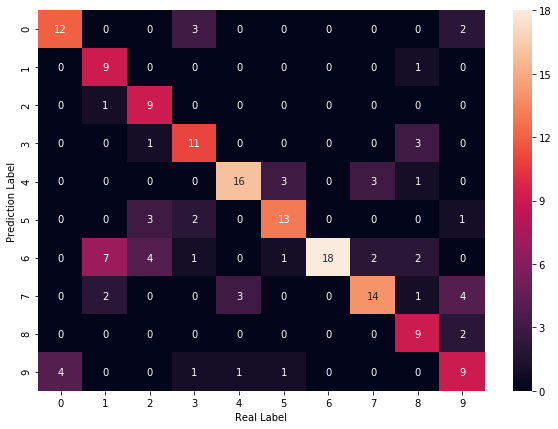

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:2 index:[6] real:5
#1 min_error:3 index:[0 3 5 9] real:2
#2 min_error:1 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1 6] real:1
#5 min_error:2 index:[6] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:1 index:[0] real:3
#8 min_error:1 index:[2] real:2
#9 min_error:3 index:[1 6] real:1
#10 min_error:2 index:[6] real:7
#11 min_error:3 index:[7] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:1 index:[3 8] real:3
#14 min_error:2 index:[1 6] real:1
#15 min_error:1 index:[0] real:3
#16 min_error:2 index:[7] real:9
#17 min_error:2 index:[1 6] real:1
#18 min_error:2 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:2 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:3 index:[1 4 6] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:1 index:[9] real:0
#26 min_error:1 index:[4] real:5
#27 min_error:2 index:[0 3 5 9] real:3
#28 min_error:0 index:[6] real:6
#29 min_error:0 index:[9] r

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7012987012987013
Avg Base Learner:0.8421768707482993


In [20]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08888888888888889
Accuracy on training set: 0.20555555555555555
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.39444444444444443
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.65
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.65


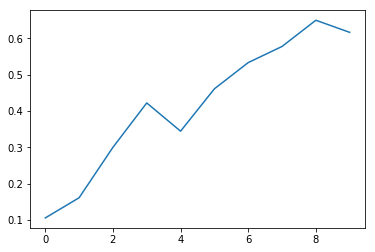

In [17]:
plt.plot(range(10),list_acc)
plt.show()

In [21]:
list_acc

[0.08888888888888889,
 0.20555555555555555,
 0.2722222222222222,
 0.37222222222222223,
 0.39444444444444443,
 0.46111111111111114,
 0.5444444444444444,
 0.6333333333333333,
 0.65,
 0.5944444444444444,
 0.65]